In [ ]:
import pandas as pds
import re
from sklearn.feature_extraction.text import CountVectorizer
import jieba

data = pds.read_excel('./comment.xlsx')
arr = []
for content in data.content:
    char = '\n'
    list=[i.start() for i in re.finditer(char, content)]
    if len(list) > 3:
        content = content[list[2]:]
    content = re.sub('\[[^\]]*\]|\n|\u200e', '', content)
    seg_list = jieba.cut(content, cut_all= False)
    str = " ".join(seg_list)
    arr.append(str)


In [ ]:

sentences = jieba.cut(arr, cut_all= False)

In [ ]:
arr

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words= 500, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(arr)




In [ ]:
total_words = len(tokenizer.word_index) + 1

In [ ]:
import numpy as np  
from keras.preprocessing.sequence import pad_sequences
input_sentences = []
for line in arr:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_pre_sequences = token_list[:i+1]
        input_sentences.append(n_pre_sequences)
max_sentences_len = max([len(x) for x in input_sentences])
input_sentences = np.array(pad_sequences(input_sentences, maxlen=max_sentences_len, padding='pre'))
input_sentences

In [ ]:
xs = input_sentences[:,:-1]
labels = input_sentences[:,-1]


In [ ]:
from tensorflow.keras.utils import to_categorical
ys = to_categorical(labels, num_classes=total_words)


In [ ]:

model = keras.models.load_model('./saved_model/my_model/')


In [20]:
model = keras.Sequential()
model.add(keras.layers.Embedding(total_words, 64, input_length=max_sentences_len - 1))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(24)))
model.add(keras.layers.Dense(total_words, activation='softmax'))
model.compile(loss = keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
# model.summary()

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 97, 64)            56512     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 48)                17088     
_________________________________________________________________
dense_1 (Dense)              (None, 883)               43267     
Total params: 116,867
Trainable params: 116,867
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(xs, ys, epochs=200, verbose=1)
# 

Epoch 1/200
135/135 [==============================] - 3s 13ms/step - loss: 5.7780 - accuracy: 0.1266
Epoch 2/200
135/135 [==============================] - 2s 13ms/step - loss: 5.2226 - accuracy: 0.1312
Epoch 3/200
135/135 [==============================] - 2s 13ms/step - loss: 5.1140 - accuracy: 0.1312
Epoch 4/200
135/135 [==============================] - 2s 13ms/step - loss: 5.0289 - accuracy: 0.1312
Epoch 5/200
135/135 [==============================] - 2s 13ms/step - loss: 4.9715 - accuracy: 0.1312
Epoch 6/200
135/135 [==============================] - 2s 13ms/step - loss: 4.9295 - accuracy: 0.1340
Epoch 7/200
135/135 [==============================] - 2s 14ms/step - loss: 4.8921 - accuracy: 0.1363
Epoch 8/200
135/135 [==============================] - 2s 13ms/step - loss: 4.8493 - accuracy: 0.1370
Epoch 9/200
135/135 [==============================] - 2s 13ms/step - loss: 4.8001 - accuracy: 0.1389
Epoch 10/200
135/135 [==============================] - 2s 13ms/step - loss: 4.743

In [23]:

def pre_text(seed_text, next_words):
    for _ in range(1, next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sentences_len - 1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        pre_index = np.argmax(predicted[0])
        for word, index in tokenizer.word_index.items():
            if index == pre_index:
               seed_text += " " +word
               break
    return seed_text.replace(" ", '')

In [24]:
epochs = 200
loss = history.history['loss']
acc = history.history['accuracy']

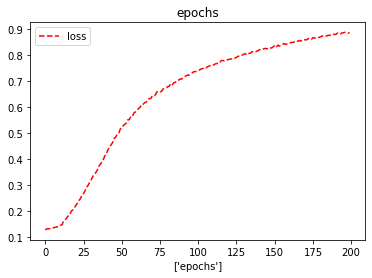

In [25]:
import matplotlib.pyplot as plt
plt.plot(acc, 'r--')
plt.xlabel(['epochs'])
plt.title('epochs')
plt.legend(["loss", 'acc'])
plt.show()

In [26]:
print(pre_text('宝贝', 100))
pre_text('一学期', 100)

宝贝，这学期进步很大，有一定的。笔画是是最难能可贵的，她看到的每个生字她都会想把她写出来的字写，现在可以整张冒满泡泡，懿杰也更开心、更自信了建议，趁热打铁，赶紧多练。让书写更优化。书写建议，暑假一定更让书写更优化。书写建议，暑假一定更优化。练字。多锻炼我了让男孩子更的时候我们比都会惊艳全班全班全班全班


'一学期快，对书法有一定的书法天赋，希望继续努力，争取更大进步较好，希望你再努力，继续练习基本笔画，字有明显感觉。学了，\u200e本期的培训内容，努力努力。相信再努力努力。相信让孩子更优化书写速度。相信让孩子更多，多练。相信再经过暑假的集训学习，让书写更优化。书写，让书写更优化。学习练字。但是需要了。不用妈妈全班全班'

In [27]:
pre_text('爱', 100)

'爱以前，学习习惯都开开心心，到还需要多多积极、更\u200e，对学习也更干净整洁。建议，下学期试着过渡毛笔，跟楷书是是班的。，或书法，人的。书写建议，暑假提高书写，让书写更优化。书写，很少被其他事情影响。让书写成为小齐齐最闪光的优点，一手漂亮的字能更让孩子更自信。相信再经过暑假的会惊艳全班会惊艳全班全班全班全班'

In [ ]:
model.save('saved_model/my_model')

In [28]:
pre_text('陈东铭进步很大', 100)

'陈东铭进步很大快，对书法有一定的书法天赋，希望继续努力，争取更大进步较好，希望你再努力，继续练习基本笔画，字有明显感觉。学了，\u200e本期的培训内容，努力努力。相信再努力努力。相信让孩子更优化书写速度。相信让孩子更多，多练。相信再经过暑假的集训学习，让书写更优化。书写，让书写更优化。学习练字。但是需要了。不用妈妈全班全班'